## 假设要采样的目标分布是二维正态分布$\mathcal{N}(\mu,\Sigma)$，其中
$$\mu = (\mu_1,\mu_2) = (5,-1)$$
$$\Sigma = \left( \begin{array}{ccc} \sigma_1^2&\rho\sigma_1\sigma_2 \\  \rho\sigma_1\sigma_2 &\sigma_2^2 \end{array} \right) =  \left( \begin{array}{ccc} 1&1 \\  1&4 \end{array} \right)$$
## 根据正态分布的性质，得到以下满条件分布
$$P(x_1|x_2) = \mathcal{N}\left ( \mu _1+\rho \frac{\sigma_1}{\sigma_2} \left ( x _2-\mu _2 \right ), (1-\rho ^2)\sigma_1^2 \right )$$
$$P(x_2|x_1) = \mathcal{N}\left ( \mu _2+\rho \frac{\sigma_2}{\sigma_1} \left ( x _1-\mu _1 \right ), (1-\rho ^2)\sigma_2^2 \right )$$

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
d:\anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


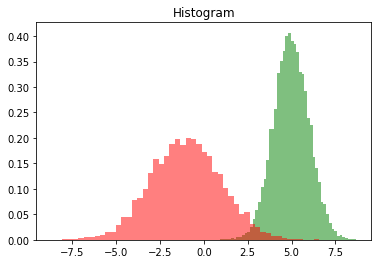

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

samplesource = multivariate_normal(mean=[5,-1], cov=[[1,1],[1,4]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (np.random.normal(m2 + rho * s2 / s1 * (x - m1), math.sqrt((1 - rho ** 2) * (s2**2))))

def p_xgiveny(y, m1, m2, s1, s2):
    return (np.random.normal(m1 + rho * s1 / s2 * (y - m2), math.sqrt((1 - rho ** 2) * (s1**2))))

N = 40000 # 采样次数
x_res = []
y_res = []
z_res = []

# 正态分布的参数
m1 = 5
m2 = -1
s1 = 1
s2 = 2
rho = 0.5

# 初始值
y = m2
for i in range(N):
    x = p_xgiveny(y, m1, m2, s1, s2)
    y = p_ygivenx(x, m1, m2, s1, s2)
    z = samplesource.pdf([x,y])
    x_res.append(x)
    y_res.append(y)
    z_res.append(z)

num_bins = 50
plt.hist(x_res[int(N/2):], num_bins, normed=1, facecolor='green', alpha=0.5)
plt.hist(y_res[int(N/2):], num_bins, normed=1, facecolor='red', alpha=0.5)
plt.title('Histogram')
plt.show()

In [22]:
print("Estimated Mean of x_1: %f" % np.mean(x_res[int(N/2):]))
print("Estimated std of x_1: %f" % np.std(x_res[int(N/2):]))
print("Estimated Mean of x_2: %f" % np.mean(y_res[int(N/2):]))
print("Estimated std of x_2: %f" % np.std(y_res[int(N/2):]))

Estimated Mean of x_1: 4.985509
Estimated std of x_1: 0.996619
Estimated Mean of x_2: -1.017296
Estimated std of x_2: 1.985456


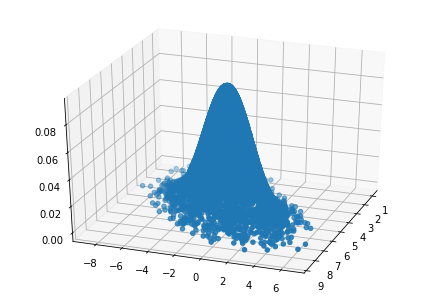

In [18]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res[int(N/2):], y_res[int(N/2):], z_res[int(N/2):],marker='o')
plt.show()